In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler
from time import time
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')

# Drop the three most irrelevant features

features = df.drop('quality', 1).values
def isGood(quality):
    if quality >= 6:
        return 1
    else:
        return 0
df['binary_quality'] = df['quality'].apply(isGood)
label = df['binary_quality'].values

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42, stratify=label)

def rescale():
    global X_train, X_test
    scaler = RobustScaler()
    # Fit only to the training data, then apply the transformations to the data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
rescale()

# Is There a Free Lunch? A Comparative Assessment of Classification Algorithms
<br><br><br><br>
**Yankang Li**

2018-01-30

# Overview

1. Machine Learning
<br><br>
2. Classification
<br><br>
3. Five Classification Algorithms
<br><br>
3. Data-sets and Methods
<br><br>
4. Results
<br><br>
5. Discussion and Outlook

## Machine Learning
<br>
How machines or computers generate knowledge from experience, without being programmed explicitly.

![Machine Learning](https://viblo.asia/uploads/d8f7a627-e0a4-49f4-9419-c91c62cf55da.png "Machine Learning")

## Classification

**Task**:Predict a class from input features.

![Classification](https://blog.webhose.io/wp-content/uploads/2017/02/rated-reviews-machine-learning-model.png "Classification")


## Classification

**No Free Lunch Theorem**: There is no perfect algorithm for every problem, especially in the case of supervised learning.
<br><br>
For general problems, the average expected performances of all algorithms are identical.
<br><br>
<font size="20">"We</font> have dubbed the associated results NFL theorems because they demonstrate that if an algorithm performs well on a certain class of problems then it necessarily pays for that with degraded performance on the set of all remaining problems.*" - Wolpert and Macready (1997)

Model is a simplification of reality. Simplification is based on assumptions. Asumptions fail in certain situations.

## Classification

**Central Problem**: Meta-classification.
<br><br>
<span style="color:blue">Given the data-sets, which algorithms should we use? </span>

## Five Classification Algorithms (1)
### *k*-Nearest-Neighbours (*k*NN)

1. There is an unlabeled data instance
<br><br>
2. Quantify the distance between the unlabeled data instance and labeled data instances
<br><br>
3. Use a majority vote from the *k* nearest labeled data to decide which category the new instance should belong to
<br><br><br>

Note: *k*NN is a lazy algorithm. It requires no training!

## Five Classification Algorithms (2)
### Support Vector Machine (SVM)
<br>
SVM constructs hyperplanes to separate the instances into different classes.
<br><br>
The hyperplane with the largest margin is the best.

![SVM](Images/SVM.jpg)

## Five Classification Algorithms (3)
### Decision Trees

CART: Classification And Regression Tree.
<br><br>
CART splits the training set in two subsets using a single feature *k* and a threshold *t_k*. How? The tupel (*k*, *t_k*) that produces the purest subsets.
<br><br>
Purity: A set is pure if it contains only a single class.

<img src="Images/DecisionTree.jpg" alt="DecisionTree" style="width: 350px;"/>

## Five Classification Algorithms (4)
### Naive Bayes

Basic assumption: each feature of the data being classified is independent of all other features given the class.

![NaiveBayes](Images/NaiveBayes.png)

## Five Classification Algorithms (5)
### Artificial Neural Network (ANN)

![NeuralNetwork](Images/NeuralNetwork.jpg)

To train a multi-layer perceptron, one algorithm is backpropagation . Each training tupel
goes through the network and the outcome label is recorded. The algorithm measures the
error of the output, goes back from the output layer through the hidden layer to the input
layer, measures the error contribute of each layer, and tunes the weights between each layer to
reduce the error

## Data-sets and Methods

![Datasets](Images/Datasets.png)

## Data-sets and Methods

### Tool: scikit-learn
<br>
![scikit-learn-logo](Images/scikit-learn-logo.png)

### Tool: scikit-learn

Data is stored in a two-dimentional array with the size of *[n_samples, n_features]*.
<br><br>
Every algorithm is exposed in scikit-learn via an *Estimator* object.

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)
print("Accuracy "+ ": "+str(np.mean(predicted == y_test)))

Accuracy : 0.7625


## Data-sets and Methods

### Exploratory Data Analysis (EDA)

EDA: Using summary statistics and visualization to help us better understand the data structure, so that we can make well-grounded assumptions about the data.

## Wine Quality: Correlation Graph

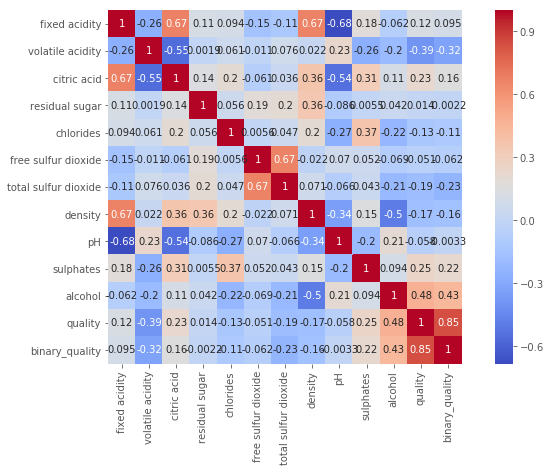

In [10]:
plt.style.use('ggplot')
correlation_matrix = df.corr()
plt.figure(figsize=(12,6.5))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='coolwarm')
plt.show()

## Data-sets and Methods

### Exploratory Data Analysis (EDA)

#### Results

*Wine Quality*:
* Some attributes have a larger range than others => **Rescaling**.
<br><br>

*20 Newsgroups*:
* The most frequently-used words are different among the newsgroups => **bag-of-words model**.
<br><br>

*Digits*:
* Principal Component Analysis (PCA) can be used to reduce dimensions.

## Data-sets and Methods

### Grid Search

*Parameters* are the coefficients found by the algorithm itself.
<img style="float: right;" width="150" src="Images/grid.png">

<br><br>
*Hyperparameters* controls the flexibility of the model.

In [8]:
def random_grid_search_result(random_search, n_iter_search):
    start = time()
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
    print(random_search.best_score_)
    print(random_search.best_params_)
    best_clf = random_search.best_estimator_
    best_clf.fit(X_train, y_train)
    predicted = best_clf.predict(X_test)
    print("Accuracy "+ " : "+str(np.mean(predicted == y_test)))

### Grid Search Example

In [9]:
def random_grid_search_knn():
    # Distribution of hyperparameter
    param_dist = {"n_neighbors": list(range(1, 31)),
                  "weights": ['uniform', 'distance'],
                  "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  "leaf_size":list(range(15, 45)),
                  "metric":['euclidean', 'manhattan', 'chebyshev'],
                  "n_jobs": [-1, 1]
                 }
    clf = KNeighborsClassifier()
    n_iter_search = 60
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, random_state=42)
    random_grid_search_result(random_search, n_iter_search)
    
random_grid_search_knn()

RandomizedSearchCV took 26.94 seconds for 60 candidates parameter settings.
0.799061767005
{'weights': 'distance', 'n_neighbors': 29, 'n_jobs': -1, 'metric': 'manhattan', 'leaf_size': 15, 'algorithm': 'kd_tree'}
Accuracy  : 0.80625


## Results

* *k*NN performs well on the binary and image classification. It takes no training time, but a long testing time.
<br><br>
* SVM and Naive Bayes have triumphed over other classifiers on the text classification. Computationally not expensive.
<br><br>
* ANN has taken substantially more time than other classifiers. However, it has good predictive power for image classification.

## Results

To determine which classifier suits the classification task best:

1. Get to know the data and its structure through data description methods such as EDA,
<br><br>
2. Pre-process the data,
<br><br>
3. Choose several classifiers which are suitable for this kind of data,
<br><br>
4. Tune the hyperparameters with the help of grid search or other tools, and
<br><br>
5. Evaluate classifier with testing set or cross-validation.

## Discussion and Outlook

Limitations:

* "Dirty data"?
<br><br>
* Test Method: Training set / test set split or cross-validation?
<br><br>
* Bag-of-words model or word2vec?
<br><br>
* Tensorflow for ANN?

<img style="float: right;" width="150" src="Images/limitations.png">

## Discussion and Outlook

<img style="float: right;" width="150" src="Images/outlook.png">

Outlook:

* Characteristics of data-sets
<br><br>
* Scalability
<br><br>
* Parallelization
<br><br>
* Hyperparameter optimization

<span style="background-color:powderblue;"><font size="20">
Thank you for your attention.
<br><br>
Questions?
</font>
</span>